# Finite Difference Method


## Introduction
To numerically approximate a linear Boundary Value Problem
\begin{equation}
y^{''}=f(t,y,y^{'}), \ \ \ a < t < b, \end{equation}
with the boundary conditions
\begin{equation}y(a)=\alpha,\end{equation} and
\begin{equation}y(b) =\beta.\end{equation}
The second derivative can be approximated by:
\begin{equation}D^{2}U_{i}=\frac{U_{i+1}-2U_{i}+U_{i-1}}{h^2}. \end{equation}

### Example Boundary Value Problem
To illustrate the method we will apply the finite difference method to the this boundary value problem
\begin{equation}  \frac{d^2 y}{dt^2} = 4y,\end{equation}
with the boundary conditions
\begin{equation} y(0)=1.1752,  y(1)=10.0179. \end{equation}

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Discrete Axis
The stepsize is defined as
\begin{equation}h=\frac{b-a}{N}\end{equation}
here it is
\begin{equation}h=\frac{1-0}{10}\end{equation}
giving
\begin{equation}x_i=0+0.1 i\end{equation}
for $i=0,1,...10.$

TypeError: 'tuple' object is not callable

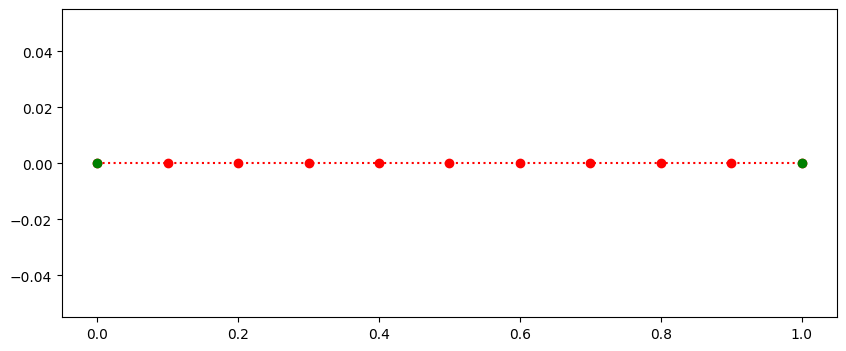

In [53]:
## BVP
N=10
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.plot(x[0],0,'o:',color='green')
plt.plot(x[10],0,'o:',color='green')


plt.xlim((0,1))
plt.xlabel('x',fontsize=16)
plt.title('Illustration of discrete time points for h=%s'%(h),fontsize=32)
plt.show()

## The Difference Equation
To convert the boundary problem into a difference equation we use 1st and 2nd order difference operators.
The general difference equation is
\begin{equation} \frac{1}{h^2}\left(y_{i-1}-2y_i+y_{i+1}\right)=4y_i \ \ \ i=1,..,N-1. \end{equation}

Rearranging the equation we have the system of N-1 equations
\begin{equation}i=1: \frac{1}{0.1^2}\color{green}{y_{0}} -\left(\frac{2}{0.1^2}+4\right)y_1 +\frac{1}{0.1^2} y_{2}=0\end{equation}
\begin{equation}i=2: \frac{1}{0.1^2}y_{1} -\left(\frac{2}{0.1^2}+4\right)y_2 +\frac{1}{0.1^2} y_{3}=0\end{equation}
\begin{equation} ...\end{equation}
\begin{equation}i=8: \frac{1}{0.1^2}y_{7} -\left(\frac{2}{0.1^2}+4\right)y_8 +\frac{1}{0.1^2} y_{9}=0\end{equation}
\begin{equation}i=9: \frac{1}{0.1^2}y_{8} -\left(\frac{2}{0.1^2}+4\right)y_9 +\frac{1}{0.1^2} \color{green}{y_{10}}=0\end{equation}
where the green terms are the known boundary conditions.

Rearranging the equation we have the system of 9 equations
\begin{equation}i=1:  -\left(\frac{2}{0.1^2}+4\right)y_1 +\frac{1}{0.1^2} y_{2}=-\frac{1}{0.1^2}\color{green}{y_{0}}\end{equation}
\begin{equation}i=2: \frac{1}{0.1^2}y_{1} -\left(\frac{2}{0.1^2}+4\right)y_2 +\frac{1}{0.1^2} y_{3}=0\end{equation}
\begin{equation} ...\end{equation}
\begin{equation}i=8: \frac{1}{0.1^2}y_{7} -\left(\frac{2}{0.1^2}+4\right)y_8 +\frac{1}{0.1^2} y_{9}=0\end{equation}
\begin{equation}i=9: \frac{1}{0.1^2}y_{8} -\left(\frac{2}{0.1^2}+4\right)y_9 =-\frac{1}{0.1^2} \color{green}{y_{10}}\end{equation}
where the green terms are the known boundary conditions.
This is system can be put into matrix form
\begin{equation}  A\color{red}{\mathbf{y}}=\mathbf{b} \end{equation}
Where A is a $9\times 9 $ matrix of the form
\begin{equation}
A=\left(\begin{array}{ccc ccc ccc}
-204&100&0& 0&0&0& 0&0&0\\
100&-204&100 &0&0&0& 0&0&0\\
0&100&-204& 100&0&0& 0&0&0\\
.&.&.& .&.&.& .&.&.\\
.&.&.& .&.&.& .&.&.\\
0&0&0& 0&0&0& 100&-204&100\\
0&0&0& 0&0&0& 0&100&-204
\end{array}\right)
\end{equation}
which can be represented graphically as:

In [ ]:
A=np.zeros((N-1,N-1))
# Diagonal
for i in range (0,N-1):
    A[i,i]=-(2/(h*h)+4)

for i in range (0,N-2):
    A[i+1,i]=1/(h*h)
    A[i,i+1]=1/(h*h)


print(A)



# plt.imshow(A)
# plt.xlabel('i',fontsize=16)
# plt.ylabel('j',fontsize=16)
# plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
# plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
# clb=plt.colorbar()
# clb.set_label('Matrix value')
# plt.title('Matrix A',fontsize=32)
# plt.tight_layout()
# plt.subplots_adjust()
# plt.show()

$\mathbf{y}$ is the unknown vector which is contains the numerical approximations of the $y$.
$$
\color{red}{\mathbf{y}}=\color{red}{
\left(\begin{array}{c} y_1\\
y_2\\
y_3\\
.\\
.\\
y_8\\
y_9
\end{array}\right).}
\end{equation}

In [ ]:
y=np.zeros((N+1))
# Boundary Condition
y[0]=1.1752
y[N]=10.0179

and the known right hand side is a known $9\times 1$ vector with the boundary conditions
\begin{equation}
\mathbf{b}=\left(\begin{array}{c}-117.52\\
0\\
0\\
.\\
.\\
0\\
-1001.79 \end{array}\right)
\end{equation}


In [ ]:
b=np.zeros(N-1)

# Boundary Condition
b[0]=-y[0]/(h*h)
b[N-2]=-y[N]/(h*h)


## Solving the system
To solve invert the matrix $A$ such that
\begin{equation}y=A^{-1}b\end{equation}

In [ ]:
invA=np.linalg.inv(A)


y[1:N]=np.dot(invA,b)

## Result
The plot below shows the approximate solution of the Boundary Value Problem (blue v) and the exact solution (black dashed line).

In [ ]:
fig = plt.figure(figsize=(8,4))

plt.plot(x,y,'v',label='Finite Difference')
plt.plot(x,np.sinh(2*x+1),'k:',label='exact')
plt.xlabel('x')
plt.ylabel('y')
#plt.xlim((0.4, 0.6))
plt.legend(loc='best')
plt.show()